In [1]:
!pip install scanpy anndata

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 6.1 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=253c93b41e7742a67e3a6ecef21e5a19958bd50aeac9260d440233f1e0d9142f
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
adata = sc.read_h5ad('/content/drive/MyDrive/anndata.h5ad')

In [11]:
def BasicScanpyPreprocessing(adata, n_top_genes = 2000, n_neighbors=10, n_pcs = 40, random_state = 20):
  sc.pp.normalize_total(adata, target_sum = 1e4)
  sc.pp.log1p(adata)
  sc.pp.highly_variable_genes(adata, n_top_genes = n_top_genes, flavor = 'seurat')
  #sc.pp.scale(adata, max_value=10)
  sc.tl.pca(adata, svd_solver = 'arpack')
  sc.pp.neighbors(adata, n_neighbors = n_neighbors, n_pcs = n_pcs, random_state = random_state)
  sc.tl.umap(adata, random_state = random_state)
  sc.tl.leiden(adata, random_state = random_state)
  return adata

In [13]:
!pip install igraph
import igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.1 MB/s eta 0:00:00


In [15]:
!pip install leidenalg
import leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.0 MB/s eta 0:00:00


In [16]:
adata = BasicScanpyPreprocessing(adata, n_top_genes = 2000, n_neighbors = 10, n_pcs = 40, random_state = 20)

<ipython-input-11-74fc4889c969>:9: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, random_state = random_state)


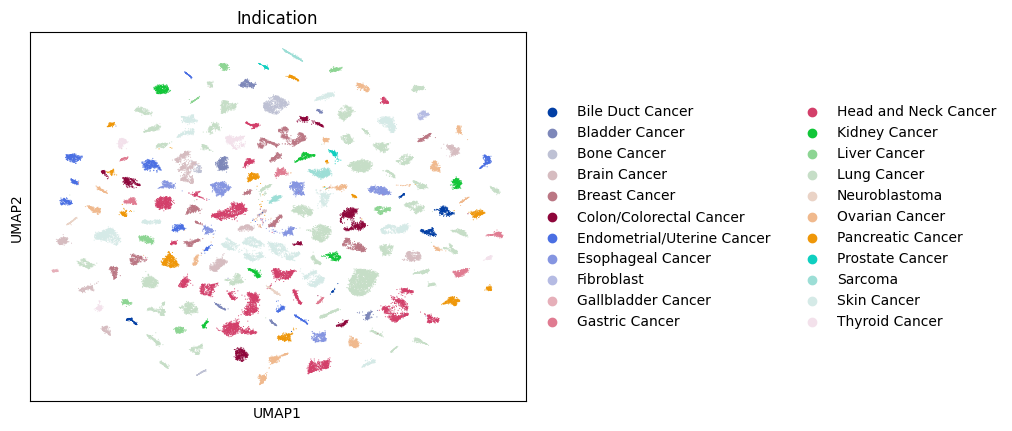

In [17]:
sc.pl.umap(adata, color = ['Indication'])